<img src="images/logoitam.gif">

# Maestría en Ciencia de Datos
## Máquinas de soporte vectorial
* Machine Learning | 27 de octubre de 2016 |
* Alumnas: 
    - Gabriela Flores Bracamontes | Clave: 160124 |
    - Guillermina Montanari Luján | Clave: 101421 |
    - Paulina Salgado Figueroa    | Clave: 160314 |

### **Objetivo**:

Obtener el entendimiento del funcionamiento de las máquinas de soporte vectorial, utilizando la librería sklearn, mediante dos ejercicios:

1. Utilice el archivo andSVM.csv, y entrene un SVM, grafique los datos y la barrera de decisión; grafique el margen, las rectas que pasan por los vectores de soporte.

2. Determinar si los puntos en el plano se encuentran contenidos en un círculo mediante maquinas de soporte vectorial .

El criterio para determinar si el punto se encontraba o no dentro del círculo fue a través de la ecuación:
  
   $(x - h)^2 + (y - k)^2  <= r^2$

Donde los puntos (h,k) corresponden al centro del círculo y r es el radio.




  

In [15]:
# -*- coding: utf-8 -*-
import pandas
import pandas as pd
import numpy as np
import csv
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import numpy
import os
import random
import math

/usr/local/lib/python2.7/dist-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [16]:
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.svm import SVC
from sklearn import svm
from matplotlib import style
style.use("ggplot")

In [25]:
m1=pandas.read_csv("andSVM.csv",";")
X1=m1.iloc[:,0]
X2=m1.iloc[:,1]
y=m1.iloc[:,2]

In [26]:
m1

,X1,X2,y
0,0,0,0
1,0,1,0
2,1,0,0
3,1,1,1
4,2,3,1
5,3,2,1
6,0,-1,0


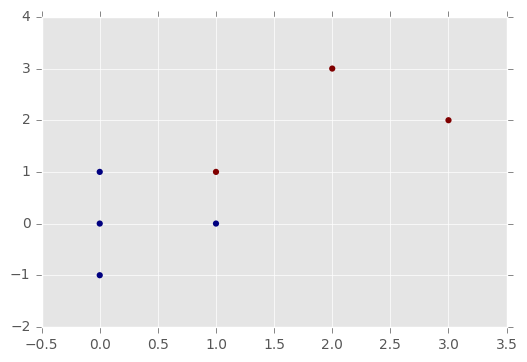

In [28]:
plt.scatter(X1, X2, c=y, linewidths=0)
plt.show()

In [29]:
clf = svm.SVC(kernel='linear', C = 20.0)
clf.fit(m1[["X1", "X2"]],m1["y"])

w0=clf.intercept_[0]
w1=clf.coef_[0,0]
w2=clf.coef_[0,1]

print(w0,w1,w2)

(-3.0, 2.0, 1.9999999999999998)


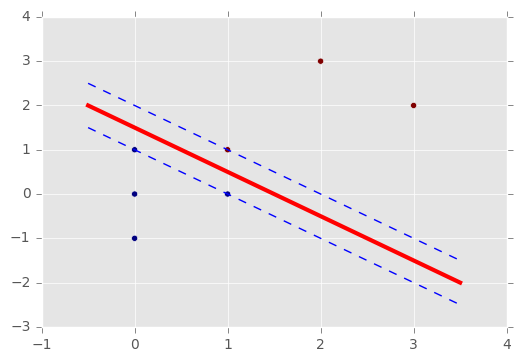

In [31]:
x_ax = np.linspace(min(X1)-0.5,max(X1)+0.5,50)
m = -w1/w2
x2 = -w0/w2+m*x_ax


supportlow = clf.support_vectors_[0]
supporthigh = clf.support_vectors_[-1]

down = x_ax*m+(supportlow[1]-supportlow[0]*m)
high = x_ax*m+(supporthigh[1]-supporthigh[0]*m)


plt.scatter(X1, X2, c=y)
plt.plot(x_ax,down,linewidth=1, linestyle='dashed',color='blue')
plt.plot(x_ax,high,linewidth=1, linestyle='dashed',color='blue')
plt.plot(x_ax,x2,linewidth=3,color='red')
plt.show()


In [51]:
#Círculo
import matplotlib.pyplot as plt
%matplotlib inline

In [72]:
#Definimos los puntos contenidos dentro y fuera del circulo
#
radio=1
datos=1000
C=np.asarray([0,0])
# Se define los puntos en el plano
X=np.random.uniform(low=-1.5,high=1.5, size=(datos,2)) 
#Se calculó la distancia del centro del ciculo C
P=X-C
cuadrado=P*P
suma_c=cuadrado.sum(axis=1)
#Se determina la distancia del centro al punto es mayo al di^metro, si es así el punto se encuentra fuera del circulo
Y=np.where(suma_c<=pow(radio,2),1.,0.)
Y=Y.reshape(datos, 1)

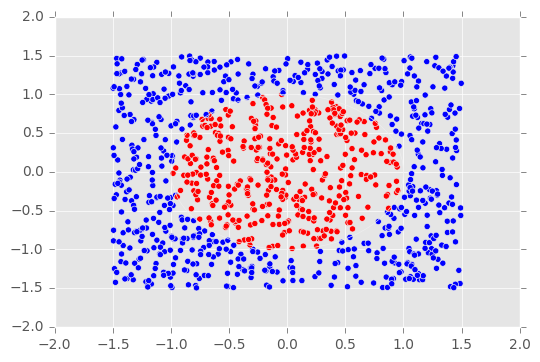

In [73]:
plt.scatter(X[:,0],X[:,1],c=['red' if i==1 else 'blue' for i in Y])
circle = plt.Circle(C, radio,fill=False )
plt.gca().add_patch(circle)

##Maquinas de soporte vectorial

In [74]:
'''Kernel linear'''
clf = svm.SVC(kernel='linear', C=50)
clf.fit(X,Y)



SVC(C=50, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

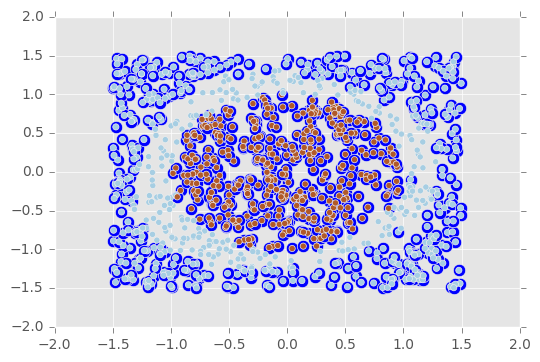

In [75]:

plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
 s=80, facecolors='blue')
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired)



In [78]:
'''Kernel Gausiana'''
clf = svm.SVC(kernel='rbf', gamma=1)
clf.fit(X,Y)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

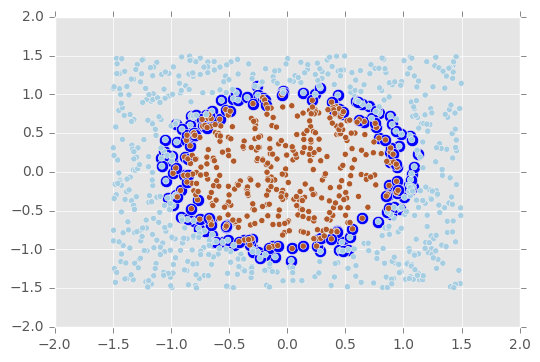

In [79]:

plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
 s=80, facecolors='blue')
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired)